In [73]:
import config
import data_logging
from FeatureExtraction import gen_time_features
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime

# model
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 1.数据

## 1.1 假设

1. 
2. 
3.

## 1.1 数据加载

In [2]:
train_path = os.path.join(config.data_dir, "Train_SU63ISt.csv")
test_path = os.path.join(config.data_dir, "Test_0qrQsBZ.csv")
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train_original = train.copy()
test_original = test.copy()

## 1.2 数据查看

In [3]:
data_logging.data_logging(train, "train")

train.head()
   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
train.tail()
          ID          Datetime  Count
18283  18283  25-09-2014 19:00    868
18284  18284  25-09-2014 20:00    732
18285  18285  25-09-2014 21:00    702
18286  18286  25-09-2014 22:00    580
18287  18287  25-09-2014 23:00    534
train.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB
None


In [4]:
data_logging.data_logging(test, "test")

test.head()
      ID          Datetime
0  18288  26-09-2014 00:00
1  18289  26-09-2014 01:00
2  18290  26-09-2014 02:00
3  18291  26-09-2014 03:00
4  18292  26-09-2014 04:00
test.tail()
         ID          Datetime
5107  23395  26-04-2015 19:00
5108  23396  26-04-2015 20:00
5109  23397  26-04-2015 21:00
5110  23398  26-04-2015 22:00
5111  23399  26-04-2015 23:00
test.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB
None


# 2.特征提取

## 2.1 提取时间特征

In [5]:
train = gen_time_features(df = train, datetime_format = "%d-%m-%Y %H:%M", datetime_is_index = False, datetime_name = "Datetime")
test = gen_time_features(df = test, datetime_format = "%d-%m-%Y %H:%M", datetime_is_index = False, datetime_name = "Datetime", is_test = True)
train_original = gen_time_features(df = train_original, datetime_format = "%d-%m-%Y %H:%M", datetime_is_index = False, datetime_name = "Datetime")
test_original = gen_time_features(df = test_original, datetime_format = "%d-%m-%Y %H:%M", datetime_is_index = False, datetime_name = "Datetime", is_test = True)

In [6]:
data_logging.data_logging(train, "train")

train.head()
   ID            Datetime  Count  year  month  day  hour  dow  weekend
0   0 2012-08-25 00:00:00      8  2012      8   25     0    5        1
1   1 2012-08-25 01:00:00      2  2012      8   25     1    5        1
2   2 2012-08-25 02:00:00      6  2012      8   25     2    5        1
3   3 2012-08-25 03:00:00      2  2012      8   25     3    5        1
4   4 2012-08-25 04:00:00      2  2012      8   25     4    5        1
train.tail()
          ID            Datetime  Count  year  month  day  hour  dow  weekend
18283  18283 2014-09-25 19:00:00    868  2014      9   25    19    3        0
18284  18284 2014-09-25 20:00:00    732  2014      9   25    20    3        0
18285  18285 2014-09-25 21:00:00    702  2014      9   25    21    3        0
18286  18286 2014-09-25 22:00:00    580  2014      9   25    22    3        0
18287  18287 2014-09-25 23:00:00    534  2014      9   25    23    3        0
train.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 

In [7]:
data_logging.data_logging(test, "test")

test.head()
      ID            Datetime  year  month  day  hour
0  18288 2014-09-26 00:00:00  2014      9   26     0
1  18289 2014-09-26 01:00:00  2014      9   26     1
2  18290 2014-09-26 02:00:00  2014      9   26     2
3  18291 2014-09-26 03:00:00  2014      9   26     3
4  18292 2014-09-26 04:00:00  2014      9   26     4
test.tail()
         ID            Datetime  year  month  day  hour
5107  23395 2015-04-26 19:00:00  2015      4   26    19
5108  23396 2015-04-26 20:00:00  2015      4   26    20
5109  23397 2015-04-26 21:00:00  2015      4   26    21
5110  23398 2015-04-26 22:00:00  2015      4   26    22
5111  23399 2015-04-26 23:00:00  2015      4   26    23
test.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        5112 non-null   int64         
 1   Datetime  5112 non-null   datetime64[ns]
 2   year      5112 

## 2.2 时间序列可视化

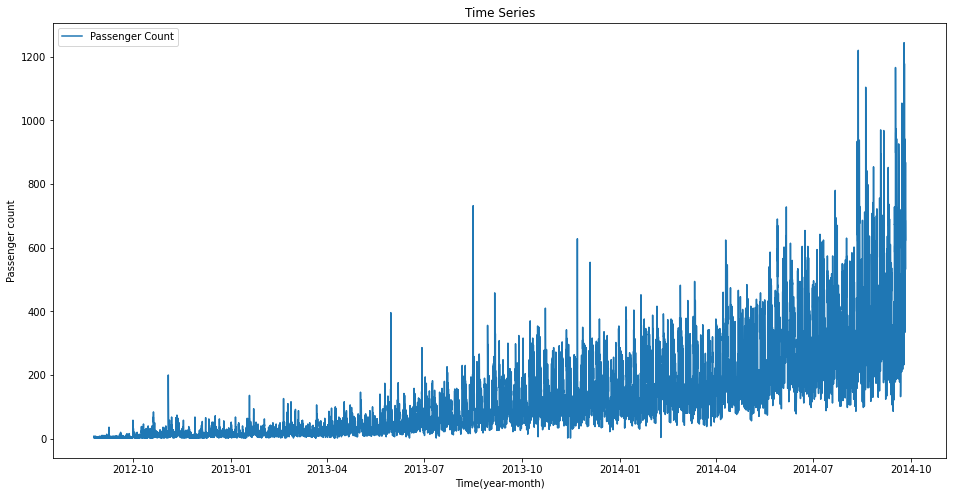

In [8]:
df = train.copy()
df.index = df["Datetime"]
df.drop("ID", axis = 1)

plt.figure(figsize = (16, 8))
plt.plot(df["Count"], label = "Passenger Count")
plt.title("Time Series")
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc = "best")

# 3.探索性分析

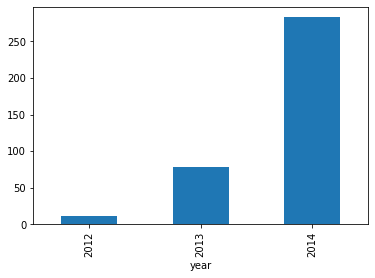

In [9]:
train.groupby(["year"])["Count"].mean().plot.bar();

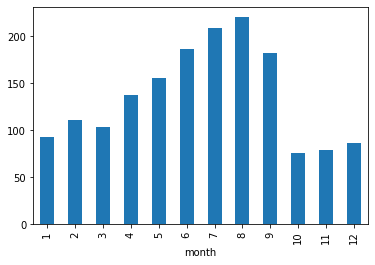

In [10]:
train.groupby(["month"])["Count"].mean().plot.bar();

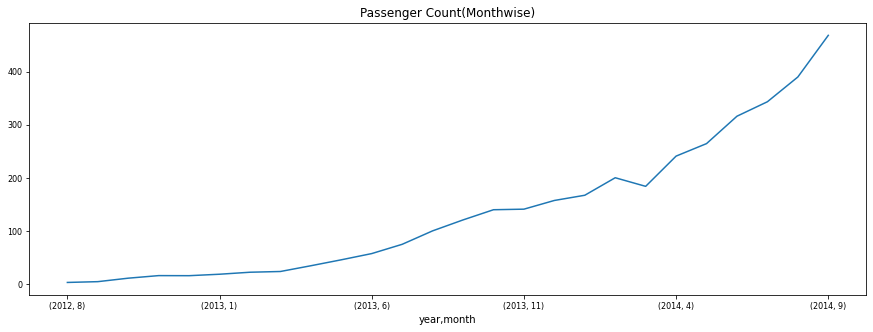

In [11]:
train.groupby(["year", "month"])["Count"].mean().plot(figsize = (15, 5), title = "Passenger Count(Monthwise)", fontsize = 8);

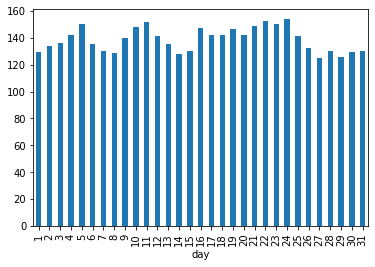

In [12]:
train.groupby(["day"])["Count"].mean().plot.bar();

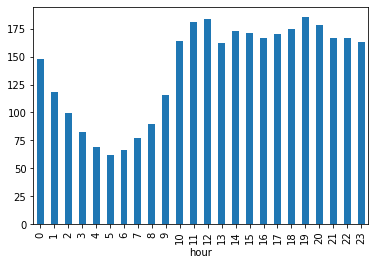

In [13]:
train.groupby(["hour"])["Count"].mean().plot.bar();

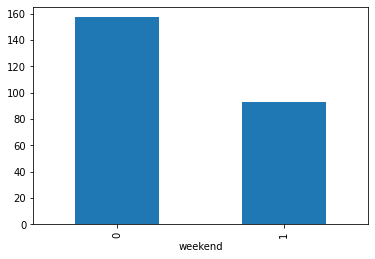

In [14]:
train.groupby(["weekend"])["Count"].mean().plot.bar();

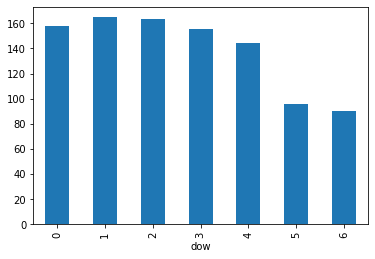

In [15]:
train.groupby(["dow"])["Count"].mean().plot.bar();

# 4.特征工程

## 4.1 数据去噪探索

In [16]:
df = train.copy()
df.drop("ID", axis = 1)
df.index = df["Datetime"]
train_hourly = df.resample("H").mean()
train_daily = df.resample("D").mean()
train_weekly = df.resample("W").mean()
train_monthly = df.resample("M").mean()

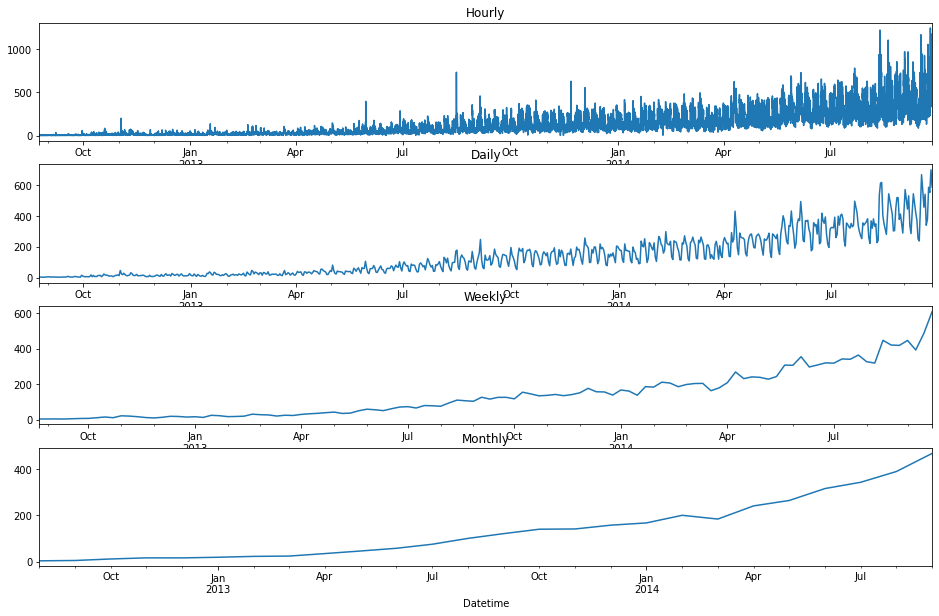

In [17]:
fig, axs = plt.subplots(4, 1)
train_hourly["Count"].plot(figsize = (16, 10), title = "Hourly", fontsize = 10, ax = axs[0])
train_daily["Count"].plot(figsize = (16, 10), title = "Daily", fontsize = 10, ax = axs[1])
train_weekly["Count"].plot(figsize = (16, 10), title = "Weekly", fontsize = 10, ax = axs[2])
train_monthly["Count"].plot(figsize = (16, 10), title = "Monthly", fontsize = 10, ax = axs[3]);

## 4.2 数据去噪

In [18]:
# train = train.drop("ID", axis = 1)
train.index = train["Datetime"]
train = train.resample("D").mean()
data_logging.data_logging(train, "train")

train.head()
               ID     Count    year  month   day  hour  dow  weekend
Datetime                                                            
2012-08-25   11.5  3.166667  2012.0    8.0  25.0  11.5  5.0      1.0
2012-08-26   35.5  3.666667  2012.0    8.0  26.0  11.5  6.0      1.0
2012-08-27   59.5  2.583333  2012.0    8.0  27.0  11.5  0.0      0.0
2012-08-28   83.5  2.416667  2012.0    8.0  28.0  11.5  1.0      0.0
2012-08-29  107.5  2.500000  2012.0    8.0  29.0  11.5  2.0      0.0
train.tail()
                 ID       Count    year  month   day  hour  dow  weekend
Datetime                                                                
2014-09-21  18179.5  379.250000  2014.0    9.0  21.0  11.5  6.0      1.0
2014-09-22  18203.5  588.166667  2014.0    9.0  22.0  11.5  0.0      0.0
2014-09-23  18227.5  554.333333  2014.0    9.0  23.0  11.5  1.0      0.0
2014-09-24  18251.5  702.333333  2014.0    9.0  24.0  11.5  2.0      0.0
2014-09-25  18275.5  589.666667  2014.0    9.0  25.0 

In [19]:
# test = test.drop("ID", axis = 1)
test.index = test["Datetime"]
test = test.resample("D").mean()
data_logging.data_logging(test, "test")

test.head()
                 ID    year  month   day  hour
Datetime                                      
2014-09-26  18299.5  2014.0    9.0  26.0  11.5
2014-09-27  18323.5  2014.0    9.0  27.0  11.5
2014-09-28  18347.5  2014.0    9.0  28.0  11.5
2014-09-29  18371.5  2014.0    9.0  29.0  11.5
2014-09-30  18395.5  2014.0    9.0  30.0  11.5
test.tail()
                 ID    year  month   day  hour
Datetime                                      
2015-04-22  23291.5  2015.0    4.0  22.0  11.5
2015-04-23  23315.5  2015.0    4.0  23.0  11.5
2015-04-24  23339.5  2015.0    4.0  24.0  11.5
2015-04-25  23363.5  2015.0    4.0  25.0  11.5
2015-04-26  23387.5  2015.0    4.0  26.0  11.5
test.info()
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213 entries, 2014-09-26 to 2015-04-26
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      213 non-null    float64
 1   year    213 non-null    float64
 2   month   213 non-null  

## 4.3 训练数据分割

In [20]:
Train = train.loc["2012-08-25":"2014-06-24", :]
Valid = train.loc["2014-06-25":"2014-09-25", :]

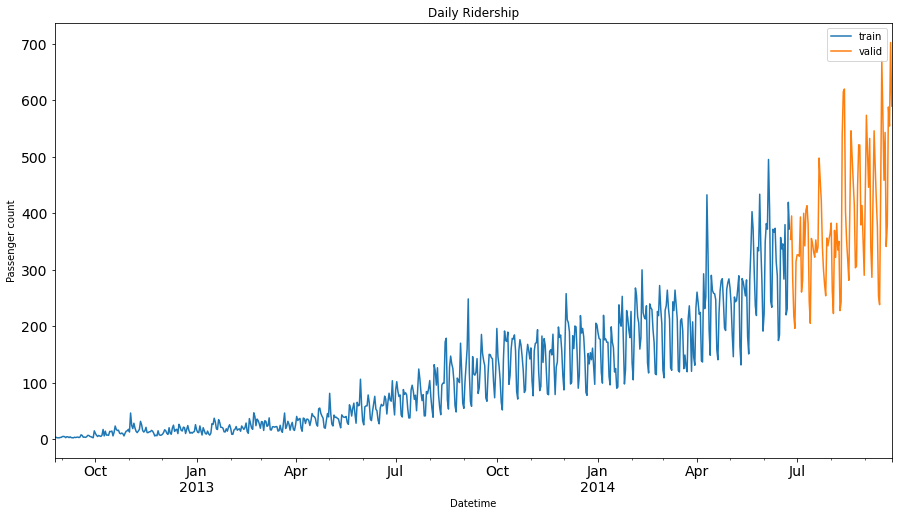

In [21]:
Train["Count"].plot(figsize = (15, 8), title = "Daily Ridership", fontsize = 14, label = "train")
Valid["Count"].plot(figsize = (15, 8), title = "Daily Ridership", fontsize = 14, label = "valid")
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc = "best")

# 5.建模

## 5.1 Naive模型

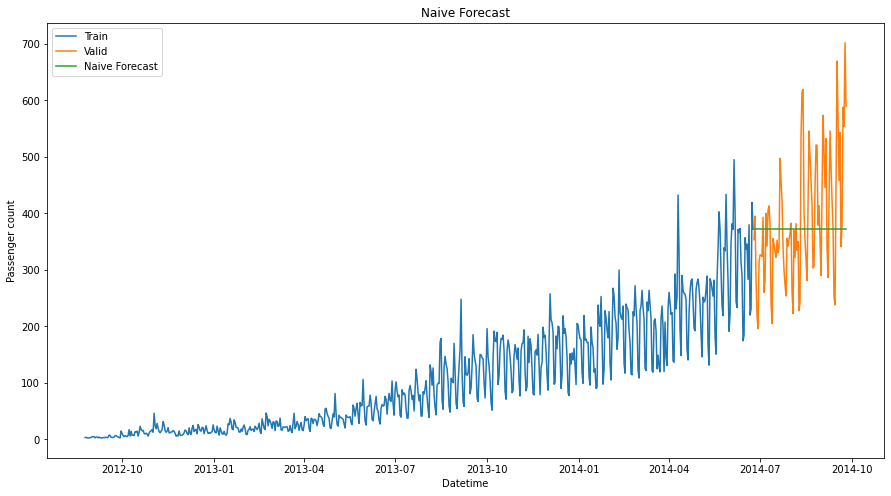

In [22]:
dd = np.asarray(Train["Count"])
y_hat = Valid.copy()
y_hat["naive"] = dd[len(dd) - 1]

plt.figure(figsize = (15, 8))
plt.plot(Train.index, Train["Count"], label = "Train")
plt.plot(Valid.index, Valid["Count"], label = "Valid")
plt.plot(y_hat.index, y_hat["naive"], label = "Naive Forecast")
plt.title("Naive Forecast")
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc = "best")
plt.show()

In [23]:
naive_rmse = math.sqrt(mean_squared_error(Valid["Count"], y_hat["naive"]))
naive_rmse

111.79050467496724

## 5.2 移动平均(Moving Average)模型

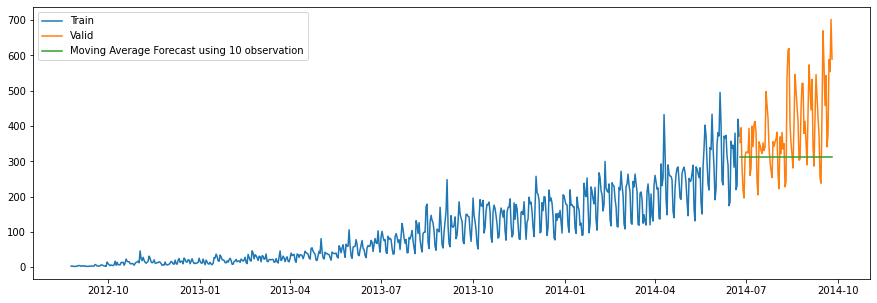

134.23733308950264


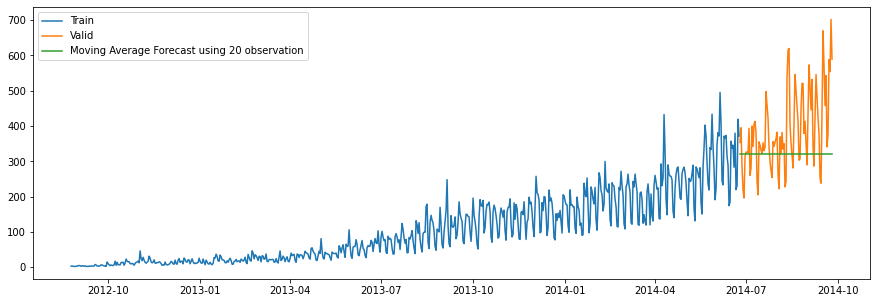

130.4498497755042


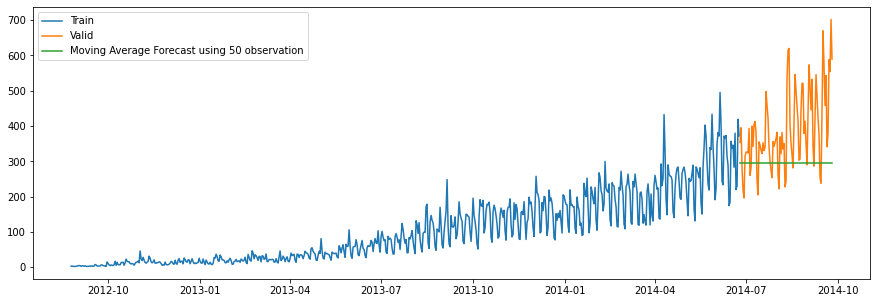

144.19175679986793


In [24]:
y_hat_avg = Valid.copy()
y_hat_avg["moving_avg_forecast"] = Train["Count"].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15, 5))
plt.plot(Train["Count"], label = "Train")
plt.plot(Valid["Count"], label = "Valid")
plt.plot(y_hat_avg["moving_avg_forecast"], label = "Moving Average Forecast using 10 observation")
plt.legend(loc = "best")
plt.show()
ma_rmse = math.sqrt(mean_squared_error(Valid["Count"], y_hat_avg["moving_avg_forecast"]))
print(ma_rmse)


y_hat_avg = Valid.copy()
y_hat_avg["moving_avg_forecast"] = Train["Count"].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15, 5))
plt.plot(Train["Count"], label = "Train")
plt.plot(Valid["Count"], label = "Valid")
plt.plot(y_hat_avg["moving_avg_forecast"], label = "Moving Average Forecast using 20 observation")
plt.legend(loc = "best")
plt.show()
ma_rmse = math.sqrt(mean_squared_error(Valid["Count"], y_hat_avg["moving_avg_forecast"]))
print(ma_rmse)


y_hat_avg = Valid.copy()
y_hat_avg["moving_avg_forecast"] = Train["Count"].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15, 5))
plt.plot(Train["Count"], label = "Train")
plt.plot(Valid["Count"], label = "Valid")
plt.plot(y_hat_avg["moving_avg_forecast"], label = "Moving Average Forecast using 50 observation")
plt.legend(loc = "best")
plt.show()
ma_rmse = math.sqrt(mean_squared_error(Valid["Count"], y_hat_avg["moving_avg_forecast"]))
print(ma_rmse)

## 5.3 简单指数平滑模型

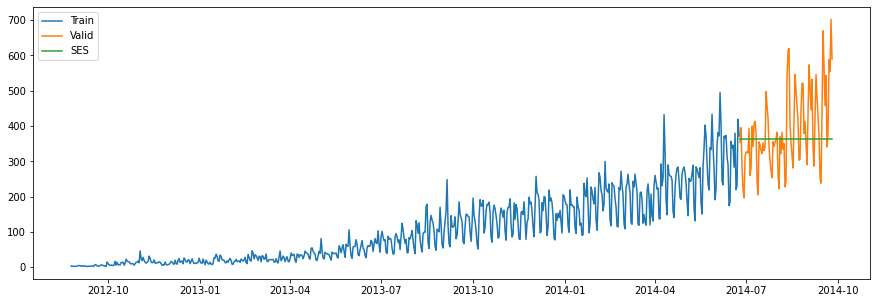

In [25]:
y_hat_avg = Valid.copy()
ses = SimpleExpSmoothing(np.asarray(Train["Count"])).fit(smoothing_level = 0.6, optimized = False)
y_hat_avg["SES"] = ses.forecast(len(Valid))
plt.figure(figsize = (15, 5))
plt.plot(Train["Count"], label = "Train")
plt.plot(Valid["Count"], label = "Valid")
plt.plot(y_hat_avg["SES"], label = "SES")
plt.legend(loc = "best")
plt.show()

In [26]:
ses_rmse = math.sqrt(mean_squared_error(Valid["Count"], y_hat_avg["SES"]))
print(ses_rmse)

113.43708111884514


## 5.4 Holt Linear 每日时间序列线性趋势模型

### 5.4.1 时间序列分解

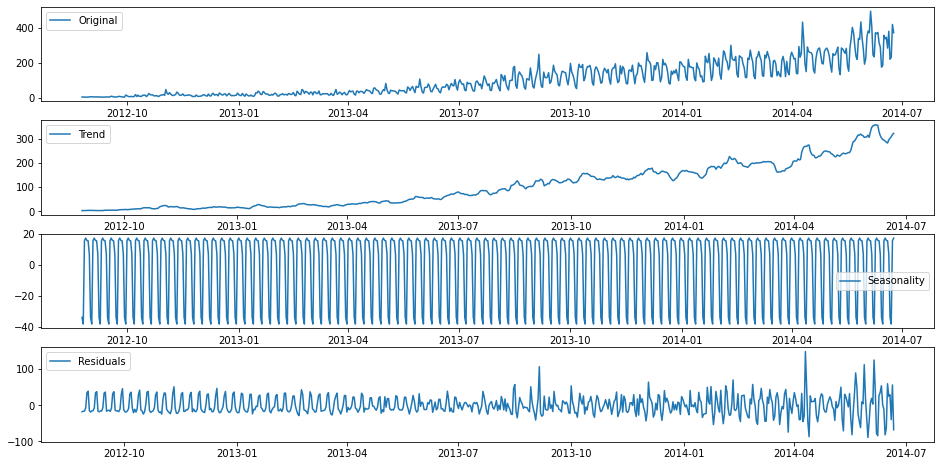

In [27]:
decomposition = seasonal_decompose(Train["Count"])
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (16, 8))
plt.subplot(411)
plt.plot(Train["Count"], label = "Original")
plt.legend(loc = "best")

plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc = "best")

plt.subplot(413)
plt.plot(seasonal, label = "Seasonality")
plt.legend(loc = "best")

plt.subplot(414)
plt.plot(residual, label = "Residuals")
plt.legend(loc = "best");

### 5.4.2 Holt Linear 模型训练

In [28]:
y_hat_avg = Valid.copy()
holt_linear = Holt(np.asarray(Train["Count"])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg["Holt_Linear"] = holt_linear.forecast(len(Valid))

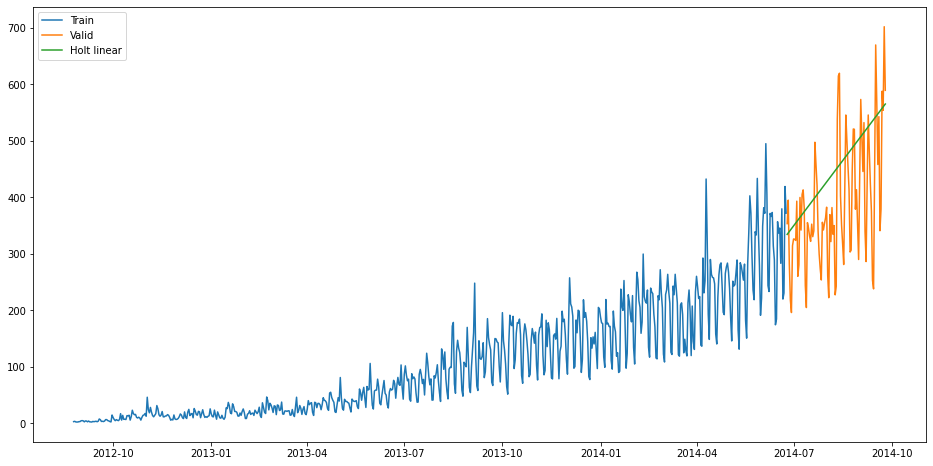

In [29]:
plt.figure(figsize = (16, 8))
plt.plot(Train["Count"], label = "Train")
plt.plot(Valid["Count"], label = "Valid")
plt.plot(y_hat_avg["Holt_Linear"], label = "Holt linear")
plt.legend(loc = "best")
plt.show()

### 5.4.3 Holt Linear RMSE

In [30]:
holt_linear_rmse = math.sqrt(mean_squared_error(Valid["Count"], y_hat_avg["Holt_Linear"]))
print(holt_linear_rmse)

112.94278345314041


### 5.4.4 Holt Linear 模型预测

In [31]:
# Holt 预测
test["prediction"] = holt_linear.forecast(len(test))
# Merge test and test_original on day, month and year
test_merge  = pd.merge(test, test_original, on = ("day", "month", "year"), how = "left")
test_merge["hour"] = test_merge["hour_y"]
test_merge = test_merge.drop(["year", "month", "Datetime", "hour_x", "hour_y"], axis = 1)
data_logging.data_logging(test_merge, "test_merge")

test_merge.head()
      ID_x   day  prediction   ID_y  hour
0  18299.5  26.0  334.650767  18288     0
1  18299.5  26.0  334.650767  18289     1
2  18299.5  26.0  334.650767  18290     2
3  18299.5  26.0  334.650767  18291     3
4  18299.5  26.0  334.650767  18292     4
test_merge.tail()
         ID_x   day  prediction   ID_y  hour
5107  23387.5  26.0  866.398583  23395    19
5108  23387.5  26.0  866.398583  23396    20
5109  23387.5  26.0  866.398583  23397    21
5110  23387.5  26.0  866.398583  23398    22
5111  23387.5  26.0  866.398583  23399    23
test_merge.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 0 to 5111
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_x        5112 non-null   float64
 1   day         5112 non-null   float64
 2   prediction  5112 non-null   float64
 3   ID_y        5112 non-null   int64  
 4   hour        5112 non-null   int64  
dtypes: float64(3), int64(2)
me

In [32]:
train_original["ratio"] = train_original["Count"] / train_original["Count"].sum()
train_original_temp1 = train_original.groupby(["hour"])["ratio"].sum()
pd.DataFrame(train_original_temp1, columns = ["hour", "ratio"]).to_csv(os.path.join(config.project_dir, "submission/GROUPby.csv"))
train_original_temp2 = pd.read_csv(os.path.join(config.project_dir, "submission/GROUPby.csv"))
train_original_temp2 = train_original_temp2.drop("hour.1", 1)
data_logging.data_logging(train_original_temp2, "train_original_temp2")

train_original_temp2.head()
   hour     ratio
0     0  0.044287
1     1  0.035343
2     2  0.029911
3     3  0.024714
4     4  0.020802
train_original_temp2.tail()
    hour     ratio
19    19  0.055627
20    20  0.053455
21    21  0.049895
22    22  0.050076
23    23  0.048892
train_original_temp2.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    24 non-null     int64  
 1   ratio   24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes
None


In [33]:
prediction = pd.merge(test_merge, train_original_temp2, on = "hour", how = "left")
prediction["Count"] = prediction["prediction"] * prediction["ratio"] * 24
prediction["ID"] = prediction["ID_y"]
submission = prediction.drop(["ID_x", "day", "ID_y", "prediction", "hour", "ratio"], axis = 1)
data_logging.data_logging(submission, "submission")
pd.DataFrame(submission, columns = ["ID", "Count"]).to_csv(os.path.join(config.project_dir, "submission/Holt_linear.csv"))
data_logging.data_logging(submission, "submission")

submission.head()
        Count     ID
0  355.692974  18288
1  283.861602  18289
2  240.234347  18290
3  198.497058  18291
4  167.075574  18292
submission.tail()
            Count     ID
5107  1156.675482  23395
5108  1111.525192  23396
5109  1037.491153  23397
5110  1041.255041  23398
5111  1016.642487  23399
submission.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   5112 non-null   float64
 1   ID      5112 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 119.8 KB
None
submission.head()
        Count     ID
0  355.692974  18288
1  283.861602  18289
2  240.234347  18290
3  198.497058  18291
4  167.075574  18292
submission.tail()
            Count     ID
5107  1156.675482  23395
5108  1111.525192  23396
5109  1037.491153  23397
5110  1041.255041  23398
5111  1016.642487  23399
submission.info()
<class 'pandas.core.frame.Dat

## 5.5 Holt Winter 每日时间序列模型

### 5.5.1 Holt Winter 模型训练

In [34]:
y_hat_avg = Valid.copy()
holt_winter = ExponentialSmoothing(np.asarray(Train["Count"]), seasonal_periods = 7, trend = "add", seasonal = "add").fit()
y_hat_avg["Holt_Winter"] = holt_winter.forecast(len(Valid))

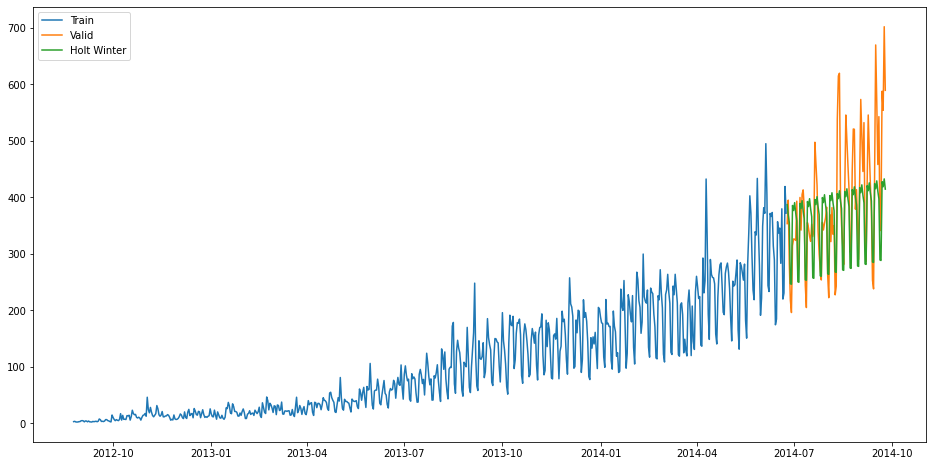

In [35]:
plt.figure(figsize = (16, 8))
plt.plot(Train["Count"], label = "Train")
plt.plot(Valid["Count"], label = "Valid")
plt.plot(y_hat_avg["Holt_Winter"], label = "Holt Winter")
plt.legend(loc = "best")
plt.show()

### 5.5.2 Holt Winter RMSE

In [36]:
holt_winter_rmse = math.sqrt(mean_squared_error(Valid["Count"], y_hat_avg["Holt_Winter"]))
print(holt_winter_rmse)

82.32182333542627


### 5.5.3 Holt Winter 模型预测

In [37]:
# Holt 预测
test["prediction"] = holt_winter.forecast(len(test))
# Merge test and test_original on day, month and year
test_merge  = pd.merge(test, test_original, on = ("day", "month", "year"), how = "left")
test_merge["hour"] = test_merge["hour_y"]
test_merge = test_merge.drop(["year", "month", "Datetime", "hour_x", "hour_y"], axis = 1)
data_logging.data_logging(test_merge, "test_merge")

test_merge.head()
      ID_x   day  prediction   ID_y  hour
0  18299.5  26.0  387.303062  18288     0
1  18299.5  26.0  387.303062  18289     1
2  18299.5  26.0  387.303062  18290     2
3  18299.5  26.0  387.303062  18291     3
4  18299.5  26.0  387.303062  18292     4
test_merge.tail()
         ID_x   day  prediction   ID_y  hour
5107  23387.5  26.0  460.608836  23395    19
5108  23387.5  26.0  460.608836  23396    20
5109  23387.5  26.0  460.608836  23397    21
5110  23387.5  26.0  460.608836  23398    22
5111  23387.5  26.0  460.608836  23399    23
test_merge.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 0 to 5111
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_x        5112 non-null   float64
 1   day         5112 non-null   float64
 2   prediction  5112 non-null   float64
 3   ID_y        5112 non-null   int64  
 4   hour        5112 non-null   int64  
dtypes: float64(3), int64(2)
me

In [38]:
train_original["ratio"] = train_original["Count"] / train_original["Count"].sum()
train_original_temp1 = train_original.groupby(["hour"])["ratio"].sum()
pd.DataFrame(train_original_temp1, columns = ["hour", "ratio"]).to_csv(os.path.join(config.project_dir, "submission/GROUPby.csv"))
train_original_temp2 = pd.read_csv(os.path.join(config.project_dir, "submission/GROUPby.csv"))
train_original_temp2 = train_original_temp2.drop("hour.1", 1)
data_logging.data_logging(train_original_temp2, "train_original_temp2")

train_original_temp2.head()
   hour     ratio
0     0  0.044287
1     1  0.035343
2     2  0.029911
3     3  0.024714
4     4  0.020802
train_original_temp2.tail()
    hour     ratio
19    19  0.055627
20    20  0.053455
21    21  0.049895
22    22  0.050076
23    23  0.048892
train_original_temp2.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    24 non-null     int64  
 1   ratio   24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes
None


In [39]:
prediction = pd.merge(test_merge, train_original_temp2, on = "hour", how = "left")
prediction["Count"] = prediction["prediction"] * prediction["ratio"] * 24
prediction["ID"] = prediction["ID_y"]
submission = prediction.drop(["ID_x", "day", "ID_y", "prediction", "hour", "ratio"], axis = 1)
data_logging.data_logging(submission, "submission")
pd.DataFrame(submission, columns = ["ID", "Count"]).to_csv(os.path.join(config.project_dir, "submission/Holt_Winter.csv"))
data_logging.data_logging(submission, "submission")

submission.head()
        Count     ID
0  411.655947  18288
1  328.522982  18289
2  278.031630  18290
3  229.727603  18291
4  193.362418  18292
submission.tail()
           Count     ID
5107  614.930538  23395
5108  590.927010  23396
5109  551.567837  23397
5110  553.568856  23398
5111  540.483931  23399
submission.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   5112 non-null   float64
 1   ID      5112 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 119.8 KB
None
submission.head()
        Count     ID
0  411.655947  18288
1  328.522982  18289
2  278.031630  18290
3  229.727603  18291
4  193.362418  18292
submission.tail()
           Count     ID
5107  614.930538  23395
5108  590.927010  23396
5109  551.567837  23397
5110  553.568856  23398
5111  540.483931  23399
submission.info()
<class 'pandas.core.frame.DataFrame'>
Int

## 5.6 ARIMA 模型

### 5.6.1 使用 Dickey Fuller 检验时间序列的平稳性

In [40]:
def test_stationarity(timeseries):
    # determing rolling statistics
    rolmean = timeseries.rolling(24).mean() # 24 hour on each day
    rolstd = timeseries.rolling(24).std()
    # plot rolling statistics
    rcParams["figure.figsize"] = 20, 10
    plt.plot(timeseries, color = "blue", label = "Original")
    plt.plot(rolmean, color = "red", label = "Rolling Mean")
    plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block = False)
    # Perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observation Userd"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

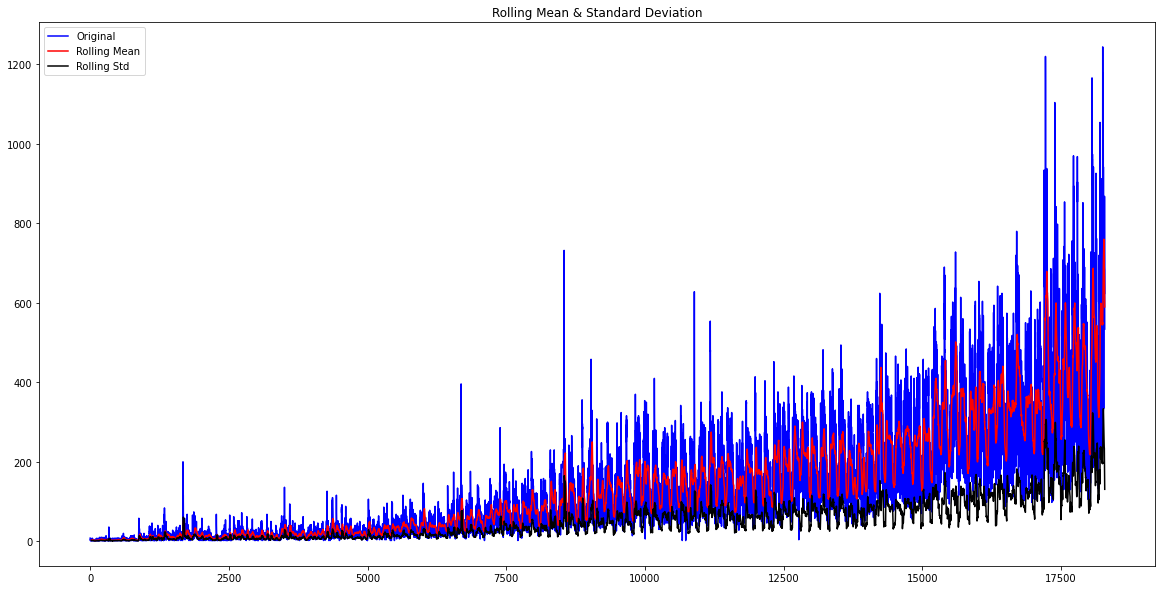

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observation Userd    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [41]:
rcParams["figure.figsize"] = 20, 10
test_stationarity(train_original["Count"])

### 5.6.2 去除趋势

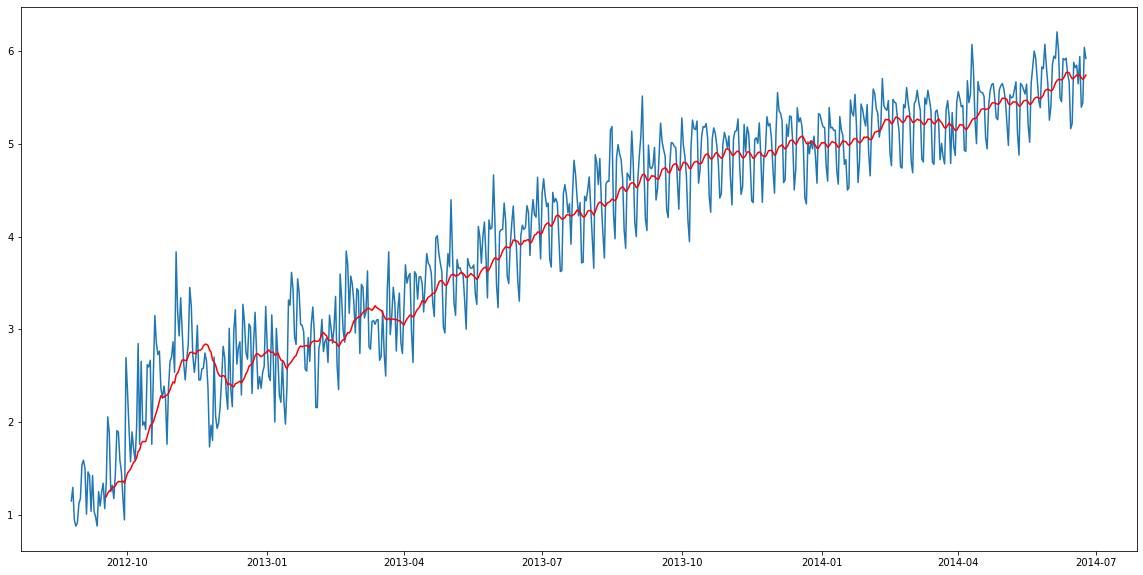

In [42]:
# 对数变换
Train_log = np.log(Train["Count"])
Valid_log = np.log(Valid["Count"])
# 移动平均
moving_avg = Train_log.rolling(24).mean()
# 对数变换后的
plt.plot(Train_log)
plt.plot(moving_avg, color = "red")
plt.show()

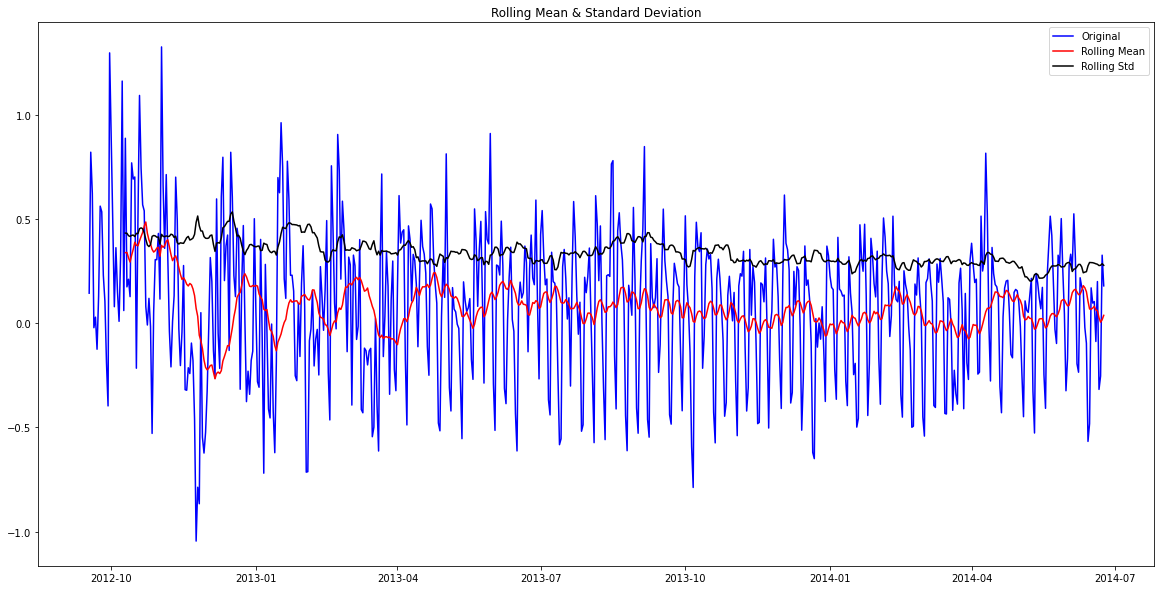

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observation Userd    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [43]:
# 移动平均去除趋势
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

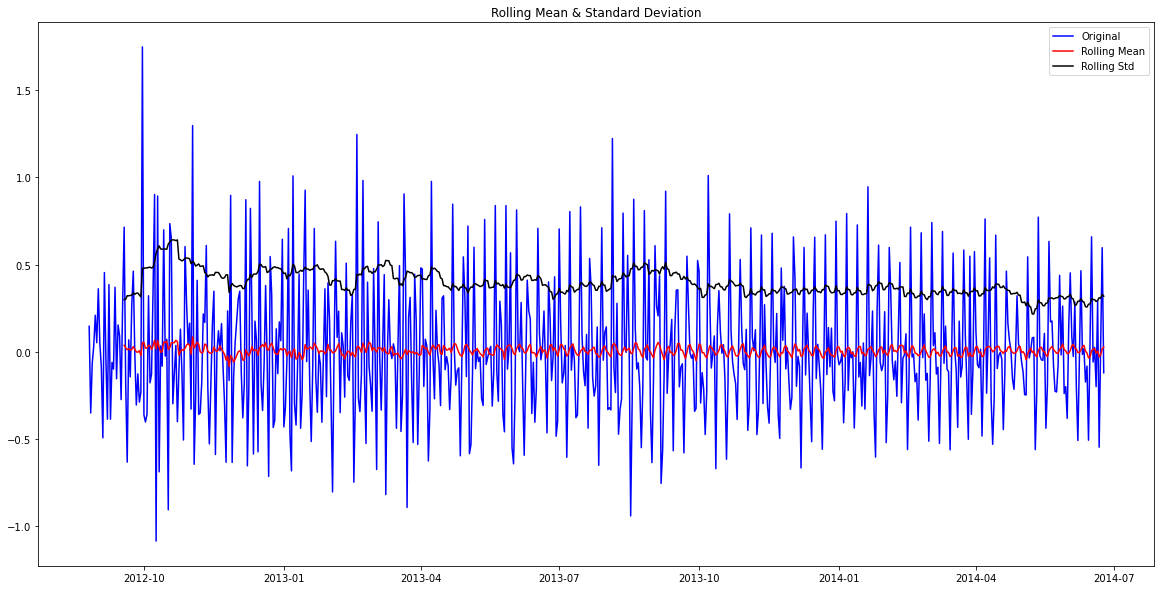

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observation Userd    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [44]:
# 差分有助于使序列平稳并消除趋势
train_log_diff = Train_log - Train_log.shift(1)
train_log_diff.dropna(inplace = True)
test_stationarity(train_log_diff)

### 5.6.3 去除季节性

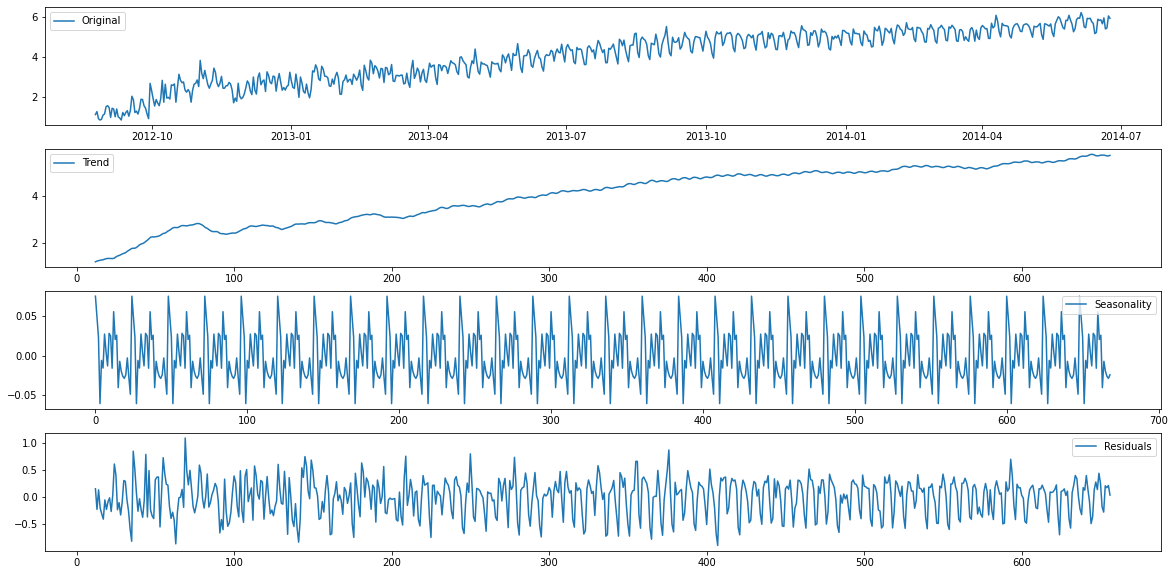

In [45]:
# 时间序列分解
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

rcParams["figure.figsize"] = 20, 10
plt.subplot(411)
plt.plot(Train_log, label = "Original")
plt.legend(loc = "best")

plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc = "best")

plt.subplot(413)
plt.plot(seasonal, label = "Seasonality")
plt.legend(loc = "best")

plt.subplot(414)
plt.plot(residual, label = "Residuals")
plt.legend(loc = "best");

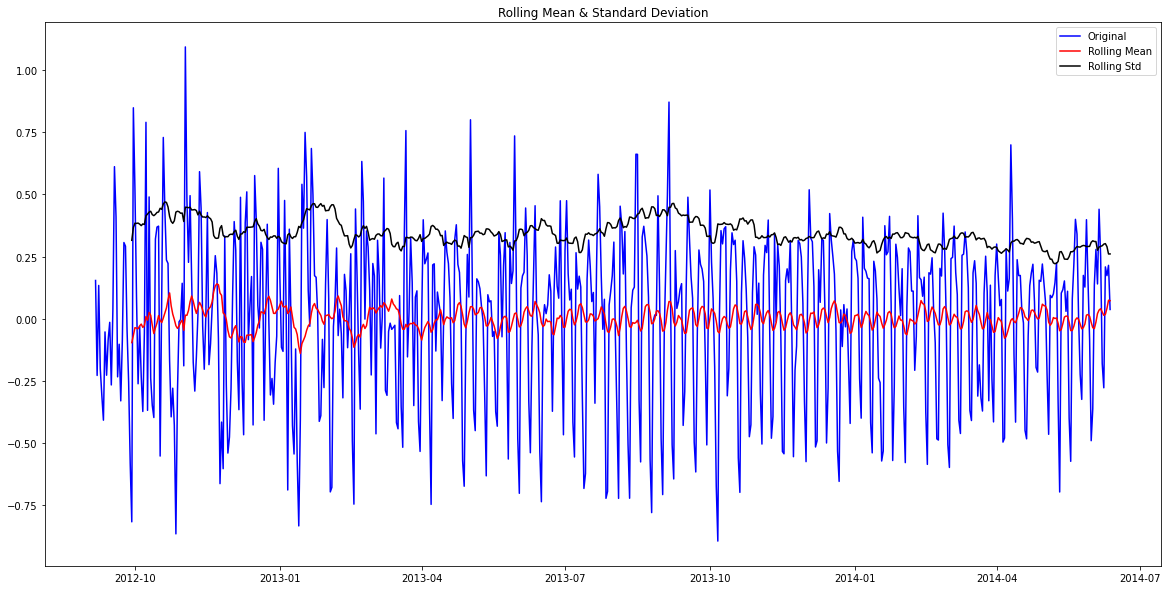

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observation Userd    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [46]:
# 检查残差的平稳性
train_log_decompose = pd.DataFrame(residual)
train_log_decompose["date"] = Train_log.index
train_log_decompose.set_index("date", inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationarity(train_log_decompose[0])

### 5.6.4 使用 ARIMA 预测时间序列

#### 5.6.4.1 ACF & PACF

In [47]:
lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method = "ols")

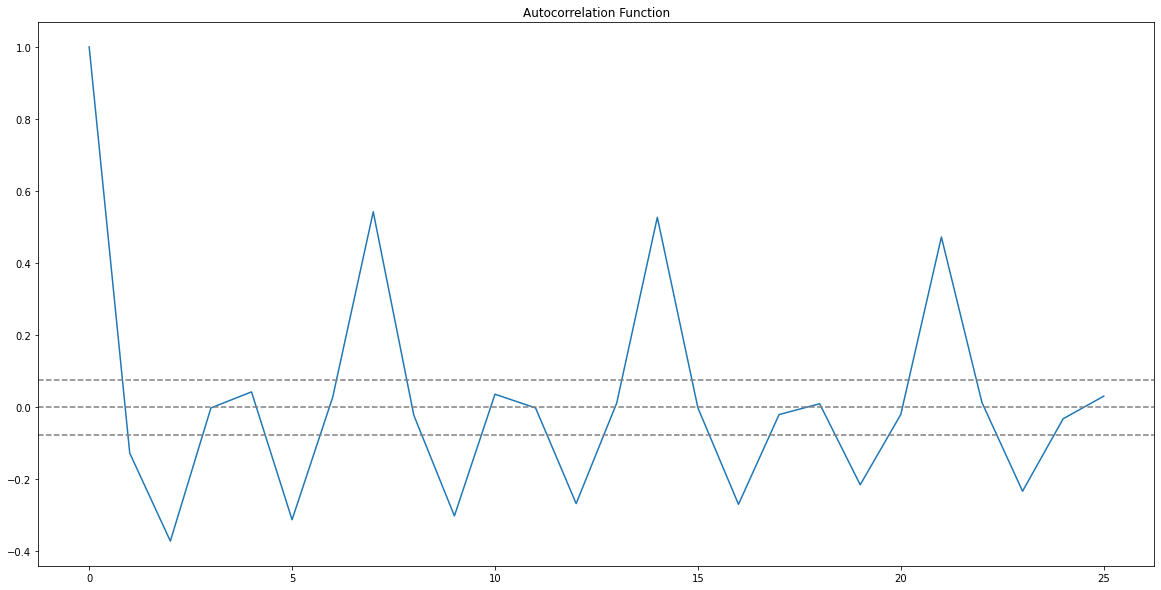

In [48]:
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96 / np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 / np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()

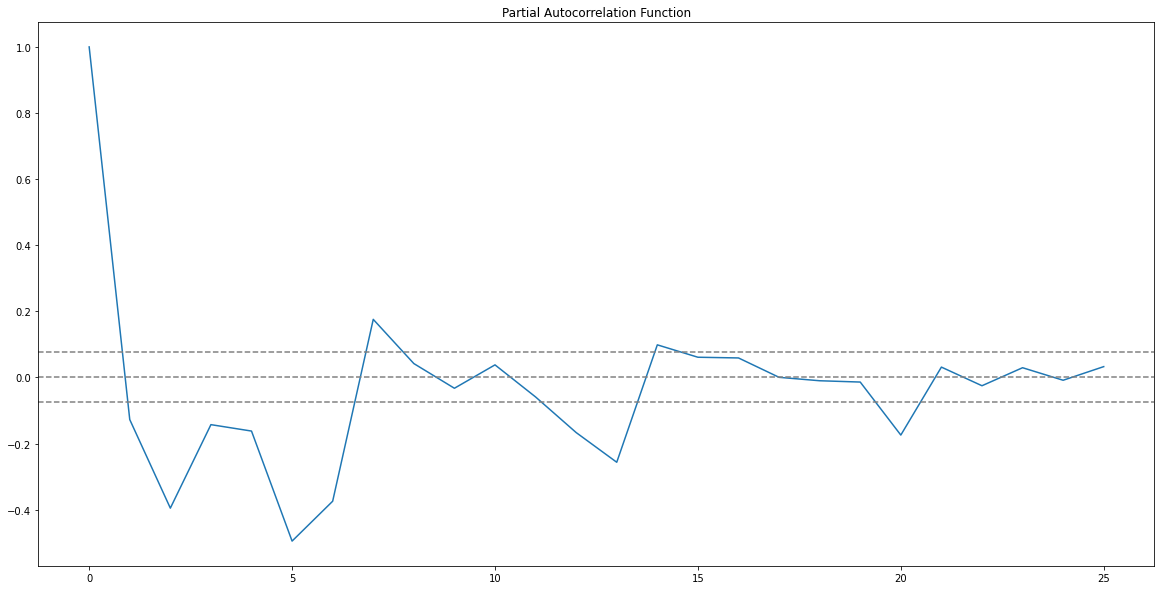

In [49]:
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96 / np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 / np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()

#### 5.6.4.2 AR

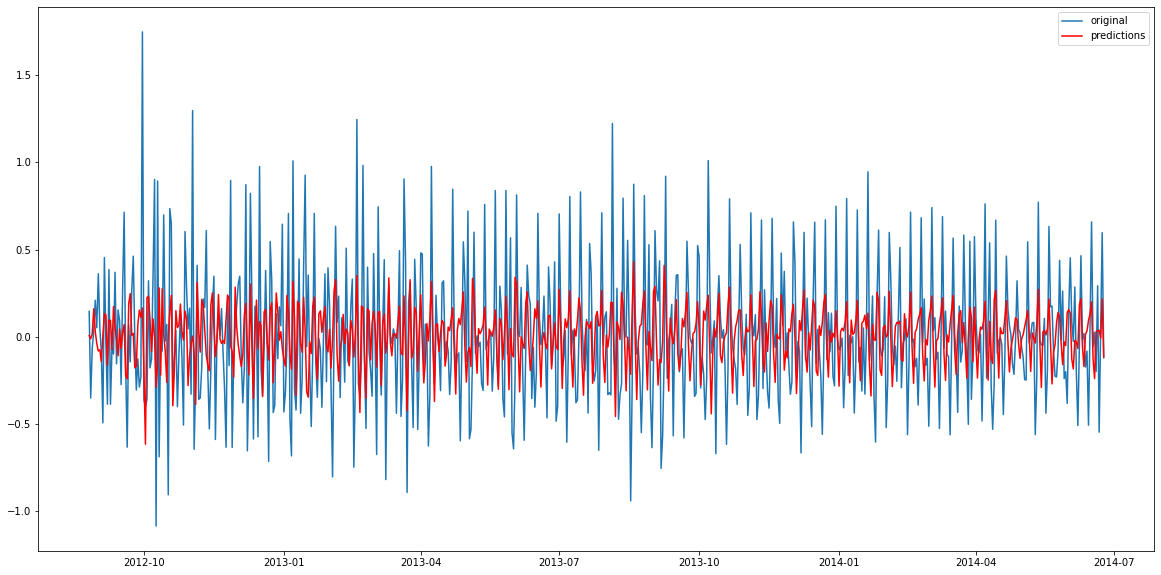

In [50]:
# AR q = 0
model = ARIMA(Train_log, order = (2, 1, 0))
results_AR = model.fit(disp = -1)

rcParams["figure.figsize"] = 20, 10
plt.plot(train_log_diff.dropna(), label = "original")
plt.plot(results_AR.fittedvalues, color = "red", label = "predictions")
plt.legend(loc = "best")
plt.show()

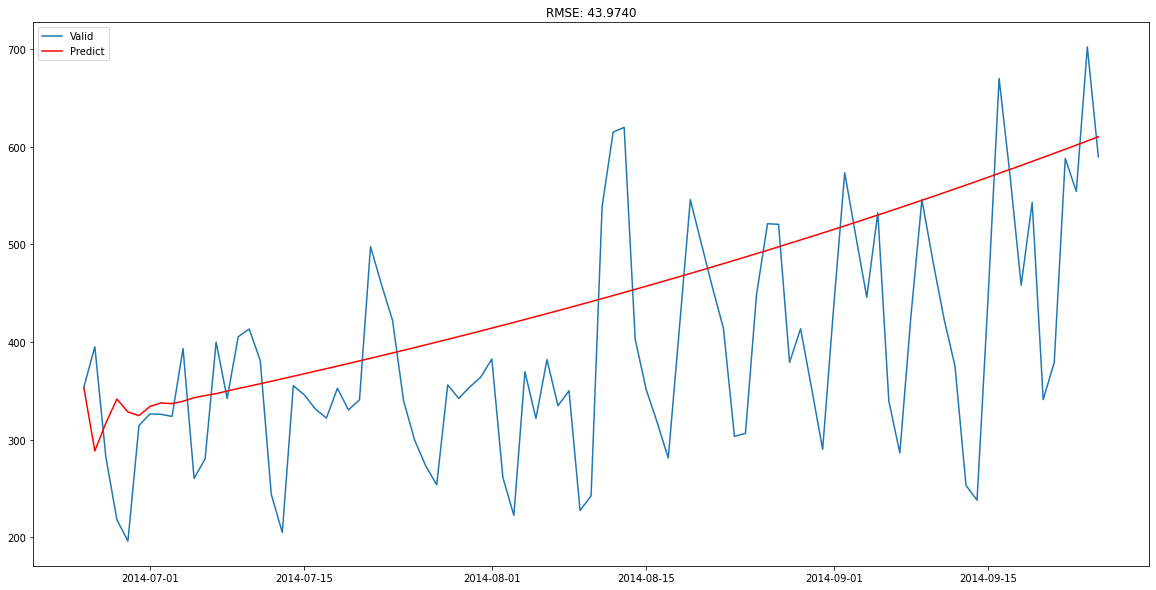

In [61]:
AR_predict = results_AR.predict(start = "2014-06-25", end = "2014-09-25")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(Valid.shape[0]) * np.log(Valid["Count"])[0], index = Valid.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value = 0)
AR_predict = np.exp(AR_predict1)

plt.plot(Valid["Count"], label = "Valid")
plt.plot(AR_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title("RMSE: %.4f" % (np.sqrt(np.dot(AR_predict, Valid["Count"])) / Valid.shape[0]))
plt.show()

#### 5.6.4.3 MA

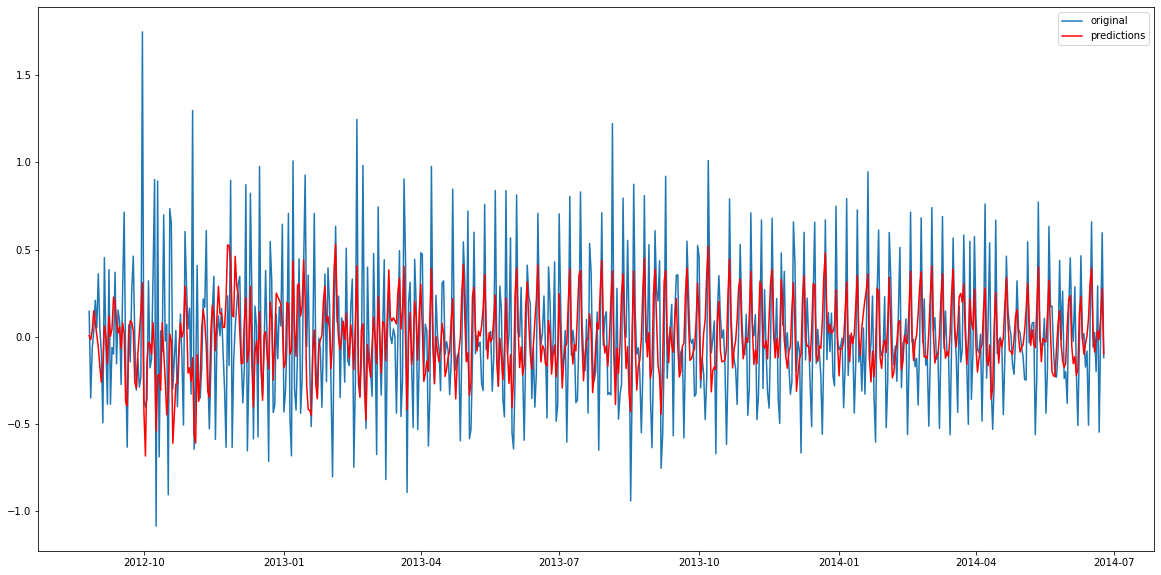

In [63]:
# MA p = 0
model = ARIMA(Train_log, order = (0, 1, 2))
results_MA = model.fit(disp = -1)

rcParams["figure.figsize"] = 20, 10
plt.plot(train_log_diff.dropna(), label = "original")
plt.plot(results_MA.fittedvalues, color = "red", label = "predictions")
plt.legend(loc = "best")
plt.show()

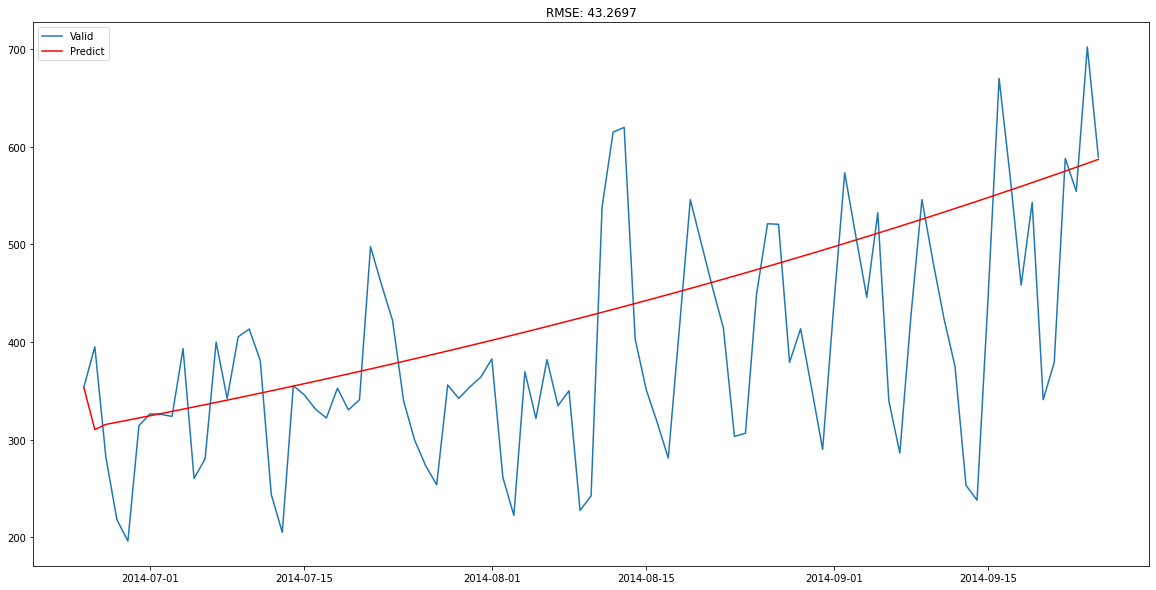

In [64]:
MA_predict = results_MA.predict(start = "2014-06-25", end = "2014-09-25")
MA_predict = MA_predict.cumsum().shift().fillna(0)
MA_predict1 = pd.Series(np.ones(Valid.shape[0]) * np.log(Valid["Count"])[0], index = Valid.index)
MA_predict1 = MA_predict1.add(MA_predict, fill_value = 0)
MA_predict = np.exp(MA_predict1)

plt.plot(Valid["Count"], label = "Valid")
plt.plot(MA_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title("RMSE: %.4f" % (np.sqrt(np.dot(MA_predict, Valid["Count"])) / Valid.shape[0]))
plt.show()

#### 5.6.4.4 ARIMA

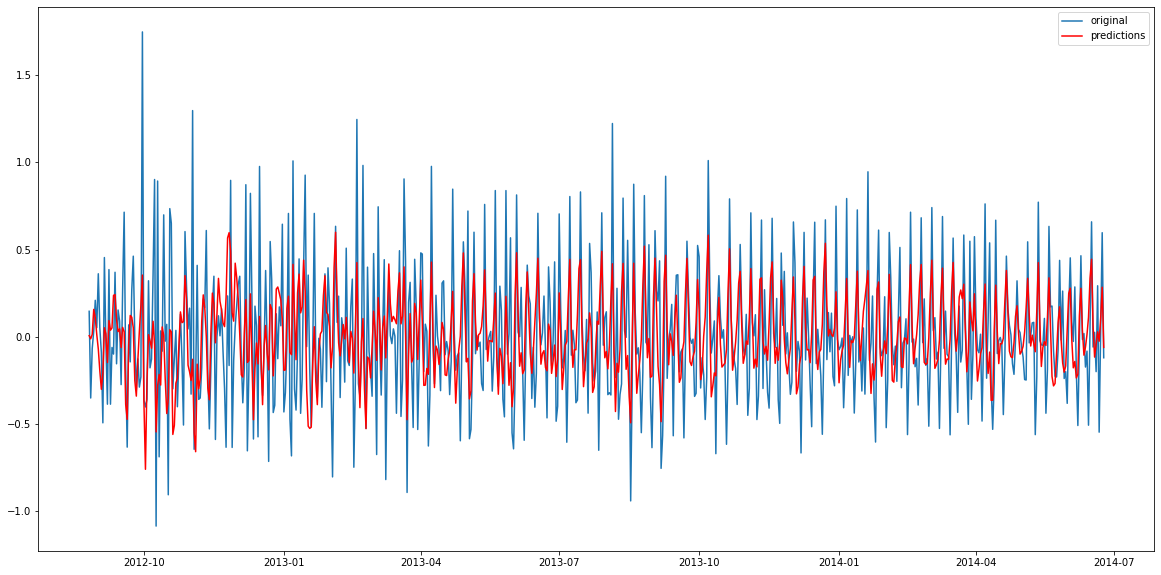

In [65]:
model = ARIMA(Train_log, order = (2, 1, 2))
results_ARIMA = model.fit(disp = -1)

rcParams["figure.figsize"] = 20, 10
plt.plot(train_log_diff.dropna(), label = "original")
plt.plot(results_ARIMA.fittedvalues, color = "red", label = "predictions")
plt.legend(loc = "best")
plt.show()

In [68]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff = predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set["Count"])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff, fill_value = 0)
    predict = np.exp(predict_log)
    plt.plot(given_set["Count"], label = "Given Set")
    plt.plot(predict, color = "red", label = "Predict")
    plt.legend(loc = "best")
    plt.title("RMSE: %.4f" % (np.sqrt(np.dot(predict, given_set["Count"])) / given_set.shape[0]))
    plt.show()
    
    
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    plt.plot(given_set["Count"], label = "Given Set")
    plt.plot(predict, color = "red", label = "Predict")
    plt.legend(loc = "best")
    plt.title("RMSE: %.4f" % (np.sqrt(np.dot(predict, given_set["Count"])) / given_set.shape[0]))
    plt.show()

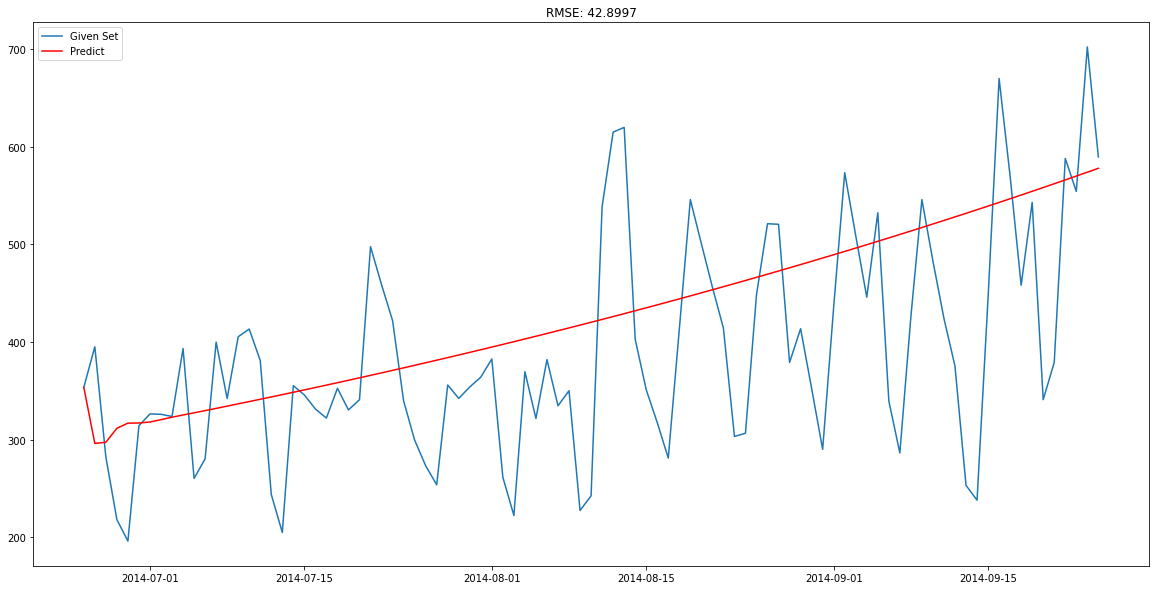

In [69]:
ARIMA_predict_diff = results_ARIMA.predict(start = "2014-06-25", end = "2014-09-25")
check_prediction_diff(ARIMA_predict_diff, Valid)

## 5.7 SARIMAX 模型

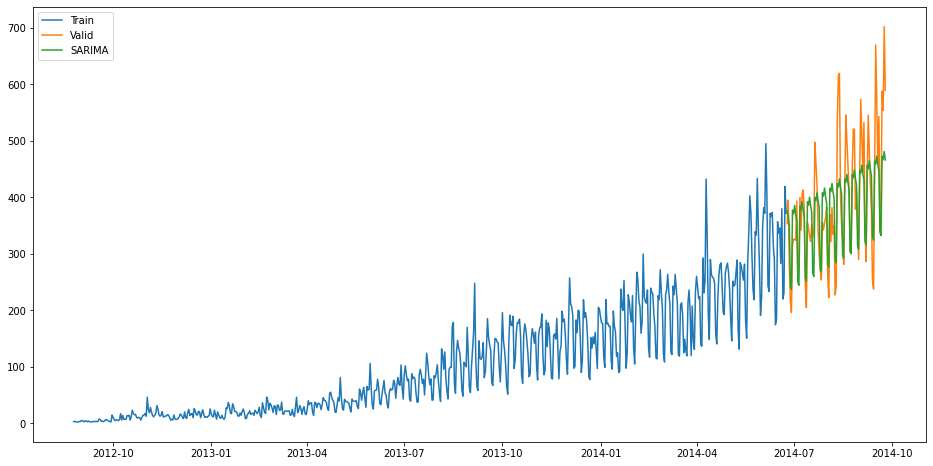

In [74]:
y_hat_avg = Valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train["Count"], order = (2, 1, 4), seasonal_order = (0, 1, 1, 7)).fit()
y_hat_avg["SARIMA"] = fit1.predict(start = "2014-06-25", end = "2014-09-25", dynamic = True)

plt.figure(figsize = (16, 8))
plt.plot(Train["Count"], label = "Train")
plt.plot(Valid["Count"], label = "Valid")
plt.plot(y_hat_avg["SARIMA"], label = "SARIMA")
plt.legend(loc = "best")
plt.show()

In [75]:
sarima_rmse = math.sqrt(mean_squared_error(Valid["Count"], y_hat_avg["SARIMA"]))
print(sarima_rmse)

69.8281273203337


In [76]:
predict = fit1.predict(start = "2014-09-26", end = "2015-04-26", dynamic = True)

In [77]:
# SARIMA 预测
test["prediction"] = predict
# Merge test and test_original on day, month and year
test_merge  = pd.merge(test, test_original, on = ("day", "month", "year"), how = "left")
test_merge["hour"] = test_merge["hour_y"]
test_merge = test_merge.drop(["year", "month", "Datetime", "hour_x", "hour_y"], axis = 1)
data_logging.data_logging(test_merge, "test_merge")

test_merge.head()
      ID_x   day  prediction   ID_y  hour
0  18299.5  26.0  454.296921  18288     0
1  18299.5  26.0  454.296921  18289     1
2  18299.5  26.0  454.296921  18290     2
3  18299.5  26.0  454.296921  18291     3
4  18299.5  26.0  454.296921  18292     4
test_merge.tail()
         ID_x   day  prediction   ID_y  hour
5107  23387.5  26.0  583.017404  23395    19
5108  23387.5  26.0  583.017404  23396    20
5109  23387.5  26.0  583.017404  23397    21
5110  23387.5  26.0  583.017404  23398    22
5111  23387.5  26.0  583.017404  23399    23
test_merge.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 0 to 5111
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_x        5112 non-null   float64
 1   day         5112 non-null   float64
 2   prediction  5112 non-null   float64
 3   ID_y        5112 non-null   int64  
 4   hour        5112 non-null   int64  
dtypes: float64(3), int64(2)
me

In [78]:
train_original["ratio"] = train_original["Count"] / train_original["Count"].sum()
train_original_temp1 = train_original.groupby(["hour"])["ratio"].sum()
pd.DataFrame(train_original_temp1, columns = ["hour", "ratio"]).to_csv(os.path.join(config.project_dir, "submission/GROUPby.csv"))
train_original_temp2 = pd.read_csv(os.path.join(config.project_dir, "submission/GROUPby.csv"))
train_original_temp2 = train_original_temp2.drop("hour.1", 1)
data_logging.data_logging(train_original_temp2, "train_original_temp2")

train_original_temp2.head()
   hour     ratio
0     0  0.044287
1     1  0.035343
2     2  0.029911
3     3  0.024714
4     4  0.020802
train_original_temp2.tail()
    hour     ratio
19    19  0.055627
20    20  0.053455
21    21  0.049895
22    22  0.050076
23    23  0.048892
train_original_temp2.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    24 non-null     int64  
 1   ratio   24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes
None


In [79]:
prediction = pd.merge(test_merge, train_original_temp2, on = "hour", how = "left")
prediction["Count"] = prediction["prediction"] * prediction["ratio"] * 24
prediction["ID"] = prediction["ID_y"]
submission = prediction.drop(["ID_x", "day", "ID_y", "prediction", "hour", "ratio"], axis = 1)
data_logging.data_logging(submission, "submission")
pd.DataFrame(submission, columns = ["ID", "Count"]).to_csv(os.path.join(config.project_dir, "submission/SARIMAX.csv"))
data_logging.data_logging(submission, "submission")

submission.head()
        Count     ID
0  482.862252  18288
1  385.349339  18289
2  326.124231  18290
3  269.464801  18291
4  226.809338  18292
submission.tail()
           Count     ID
5107  778.350692  23395
5108  747.968134  23396
5109  698.149109  23397
5110  700.681906  23398
5111  684.119613  23399
submission.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   5112 non-null   float64
 1   ID      5112 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 119.8 KB
None
submission.head()
        Count     ID
0  482.862252  18288
1  385.349339  18289
2  326.124231  18290
3  269.464801  18291
4  226.809338  18292
submission.tail()
           Count     ID
5107  778.350692  23395
5108  747.968134  23396
5109  698.149109  23397
5110  700.681906  23398
5111  684.119613  23399
submission.info()
<class 'pandas.core.frame.DataFrame'>
Int